In [1]:
from sklearn import tree
import pandas as pd
import os
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import BernoulliNB
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import confusion_matrix, classification_report
import numpy as np
import seaborn as sns

In [2]:
df = pd.read_csv(os.path.join("..", "data", "final_bitcoin.csv"))
df.head()

,Unnamed: 0,Datetime,cleaned,negative,neutral,positive,comp
0,0,2022-05-01,"['oh', 'think', 'im', 'pull', 'ass', 'bitcoin'...",0.304,0.696,0.000,-0.5423
1,1,2022-05-01,"['cryptic', 'oz', 'bitcoin', 'es', 'baloncesto...",0.000,1.000,0.000,0.0000
2,2,2022-05-01,"['un', 'long', 'sandbox', 'sandbox', 'crypto',...",0.000,1.000,0.000,0.0000
3,3,2022-05-01,"['realiz', 'attract', 'religion', 'asset', 'pr...",0.000,0.414,0.586,0.8360
4,4,2022-05-01,"['ridicul', 'stock', 'bitcoin', 'money', 'lite...",0.114,0.773,0.114,0.0000


In [3]:
df_neg = df[df['negative'] > 0.2]
df_pos = df[df['positive'] > 0.2]

In [4]:
df_pos

,Unnamed: 0,Datetime,cleaned,negative,neutral,positive,comp
3,3,2022-05-01,"['realiz', 'attract', 'religion', 'asset', 'pr...",0.000,0.414,0.586,0.8360
8,8,2022-05-01,"['outkastnft', 'se7enthdegen', 'gooneytoonsnft...",0.000,0.672,0.328,0.5267
18,18,2022-05-01,"['willpapp', 'hahahaha', 'holyyyy', 'cow', 'lm...",0.180,0.619,0.201,0.1027
19,19,2022-05-01,"['letsgo', 'bitcoin', 'well']",0.000,0.488,0.512,0.2732
25,25,2022-05-01,"['yet', 'invent', 'guy', 'bitcoin', 'person', ...",0.000,0.733,0.267,0.5780
...,...,...,...,...,...,...,...
149980,9966,2022-05-14,"['tendermint', 'bitcoin', 'cool', 'lil', 'gizmo']",0.000,0.635,0.365,0.3182
149982,9968,2022-05-14,"['market', 'ralli', 'friday', 'dead', 'cat', '...",0.223,0.518,0.259,-0.0772
149989,9975,2022-05-14,"['bitcoin', 'like', 'allig', 'feed', 'full', '...",0.000,0.737,0.263,0.3612
149992,9978,2022-05-14,"['refer', 'friend', 'get', '100', 'usdt', 'htt...",0.000,0.758,0.242,0.4939


In [5]:
print(len(df_neg))
print(len(df_pos))

5283
16407

13489
25287


16407

In [6]:
positive = df_pos['cleaned']

from matplotlib import pyplot as plt
from wordcloud import WordCloud 


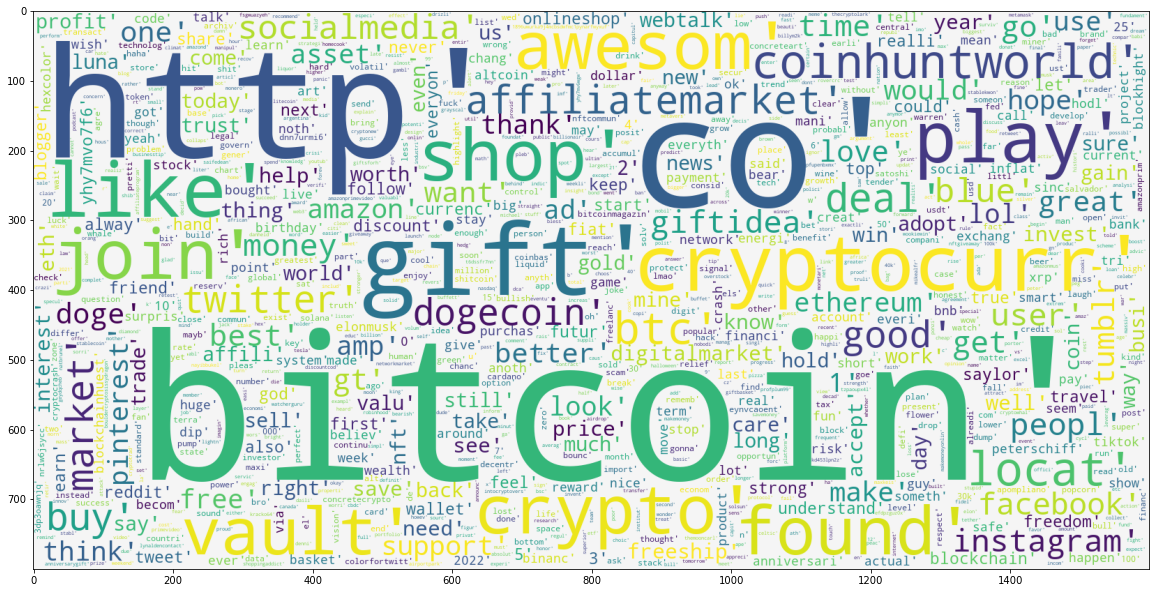

In [7]:
positive = df_pos['cleaned']
plt.figure(figsize = (20,20))
wc = WordCloud(background_color='whitesmoke',max_words = 1000 , width = 1600 , height = 800,
               collocations=False).generate(" ".join(positive))
plt.imshow(wc)

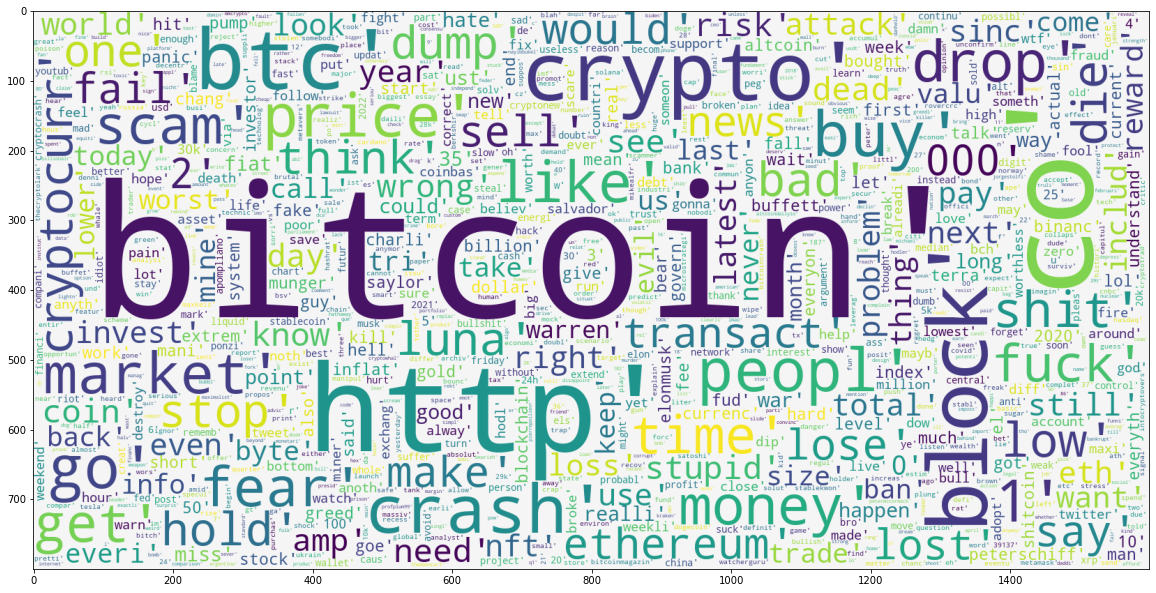

In [8]:
negative = df_neg['cleaned']
plt.figure(figsize = (20,20))
wc2 = WordCloud(background_color='whitesmoke',max_words = 1000 , width = 1600 , height = 800,
               collocations=False).generate(" ".join(negative))
plt.imshow(wc2)

In [9]:

##asigning value to positive, negative and neutral, negative(0), neutral(1), positive(2)
sentiment0=[]
for i in range(len(df)):
    if df.loc[i,'negative']>0:
        sentiment0+=[0]
    elif df.loc[i,'positive']>0:
        sentiment0+=[2]        
    else:
        sentiment0+=[1]     

In [10]:
df['sentiment']=sentiment0
df['sentiment'].value_counts()

df.head()

,Unnamed: 0,Datetime,cleaned,negative,neutral,positive,comp,sentiment
0,0,2022-05-01,"['oh', 'think', 'im', 'pull', 'ass', 'bitcoin'...",0.304,0.696,0.000,-0.5423,0
1,1,2022-05-01,"['cryptic', 'oz', 'bitcoin', 'es', 'baloncesto...",0.000,1.000,0.000,0.0000,1
2,2,2022-05-01,"['un', 'long', 'sandbox', 'sandbox', 'crypto',...",0.000,1.000,0.000,0.0000,1
3,3,2022-05-01,"['realiz', 'attract', 'religion', 'asset', 'pr...",0.000,0.414,0.586,0.8360,2
4,4,2022-05-01,"['ridicul', 'stock', 'bitcoin', 'money', 'lite...",0.114,0.773,0.114,0.0000,0


In [11]:
target = df["cleaned"]
target_names = df[["sentiment"]]


In [15]:
# Separating the 95% data for training data and 5% for testing data
X_train, X_test, y_train, y_test = train_test_split(target, target_names,test_size = 0.05, random_state = 42)

In [16]:
vectoriser = TfidfVectorizer(ngram_range=(1,2), max_features=600000)
vectoriser.fit(X_train)
print('No. of feature_words: ', len(vectoriser.get_feature_names()))

No. of feature_words:  600000


In [17]:
X_train = vectoriser.transform(X_train)
X_test  = vectoriser.transform(X_test)

In [18]:
def model_Evaluate(model):
    y_pred = model.predict(X_test)
    print(classification_report(y_test, y_pred))
    cf_matrix = confusion_matrix(y_test, y_pred)
    
    sentiment = ['Negative','Neutral', 'Positive']
    group_names = ['True Neg','False Pos', 'False Neg','True Pos']
    
    group_percentages = ['{0:.2%}'.format(value) for value in cf_matrix.flatten() / np.sum(cf_matrix)]
    labels = [f'{v1}n{v2}' for v1, v2 in zip(group_names,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)
    sns.heatmap(cf_matrix, cmap = 'Blues', annot=True, fmt='d',
                xticklabels = sentiment, yticklabels = sentiment)
    plt.xlabel("Predicted values", fontdict = {'size':14}, labelpad = 10)
    plt.ylabel("Actual values" , fontdict = {'size':14}, labelpad = 10)
    plt.title ("Confusion Matrix", fontdict = {'size':18}, pad = 20)
    

/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


              precision    recall  f1-score   support

           0       0.84      0.73      0.78      1862
           1       0.80      0.97      0.88      3689
           2       0.92      0.67      0.78      1950

    accuracy                           0.83      7501
   macro avg       0.85      0.79      0.81      7501
weighted avg       0.84      0.83      0.83      7501



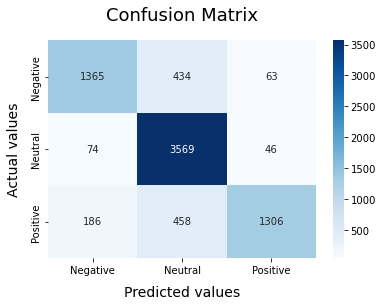

In [19]:
BNBmodel = BernoulliNB()
BNBmodel.fit(X_train, y_train)
model_Evaluate(BNBmodel)
y_pred1 = BNBmodel.predict(X_test)